# Overfitting and Underfitting
Recall:

**Overfitting** is when our training has focused so much on the particular training set, it has 'missed the point'

**Underfitting** is when the model has not captured the underlying logic of the data

The **bias-variance tradeoff** is the balance between underfitting and overfitting

# What is Validation?
We can usually identify overfitting by splitting our dataset into 3 subsets; training, validation, and test.
- The training dataset is where we train the model, and is mostly what we have worked on up until now.
- The validation dataset helps us detect and prevent overfitting

All training is done on the training set, i.e. we update the weights and biases for the training set only, every once in a while we stop training for a bit, at this point the model is somewhat trained. 

Next we run the model on the validation set, and we only propagate forward, in other word we just calculate the loss function of the validation set. On average it should be equal to the training loss, as both sets are subsets of the original dataset.

Normally we would perform this process many times in the process of creating a good machine learning algorithm. 

If the validation loss at any point starts increasing then overfitting of the model is occurring, at this point we should stop training the model.

**It is very important that the model is not trained on the validation set as this defeats its whole point**

# Training, validation, and test
- The test set measures the final predictive power of the model
- The accuracy that we get by forward propagating the test set is the accuracy we expect the model to have of we use it in real life

## Summary
1. We get a dataset
2. Split it into 3 parts, do we split the model evenly?
    - No, usually we use an 80/10/10 or a 70/20/10 split
3. We train only on the training set
4. Every now and then we run the model through the validation dataset, but how often is every now and then?
    - Usually we validate at the end of every epoch, every time we adjust all weights and calculate the training loss we validate
5. We test the model with the test set, the accuract we obtain here is the accuracy of the algorithm

# N-Fold Cross Validation
- If the dataset is really small we can't afford to split the dataset into 3, as we could miss some of the underlying logic of the data. Or worse still, we may have such little data left for training the algorithm can't learn anything.
- To solve this we use n-fold cross validation, this combines the training and validation set in a clever way, however it still requires a test subset
- We split the training and validation set into n chunks, with 1 chunk being the validation set for that epoch. For the next epoch we use a different chunk for the validation set.

In the diagram below the blue chunk is the validation set and the pink are the training set for each epoch

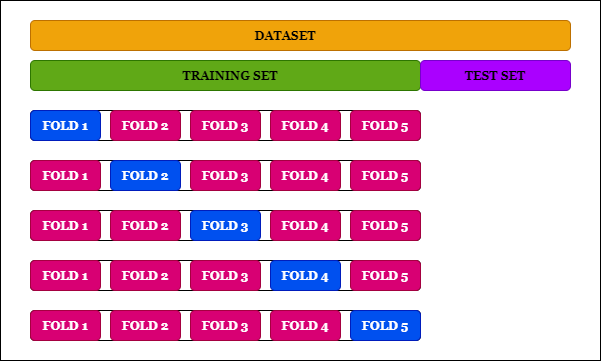

### Pros and Cons
Pros:
- Utilized more data in testing
- We have a model

Cons:
- Trained on validation set
- Possibly overfitted a bit

# Early Stopping/ When to stop training
This is a technique to prevent overfitting by stopping the training early.

### Most common ways
1. Train for a preset number of epochs
    - **Pros:** Eventually solves the problem
    - **Cons:** No guarantee the min is reached, maybe doesn't minimize at all, can lead to overfitting
    
2. Stop when the loss function updates become sufficiently small
    - **Pros:** We are sure the loss is minimized, saves computing power by using as few iterations as possible
    - **Cons:** Can lead to overfitting
    
3. Validation set strategy
- This works as we stop when the validation loss is minimized not when the training loss is. When overfitting occurs the validation loss starts increasing again.
    - **Pros:** Validation loss is minimized, saves computing power, prevents overfitting
    - **Cons:** Can iterate uselessly, as the strategy iterates until overfitting starts
    
The best practice is to stop when the training function becomes sufficiently small and when the validation loss is minimal

# Initialization
This is the process in which we set the initial values of weights. An inappropriate initialization leads to a model that cannot be optimized.

### Types of Simple Initialization
1. Random uniform initializer (like we did for the weights and biases previously), each number in the range has an equal probability to be selected
2. Normal initializer, we pick the numbers from a 0 mean normal distribution, numbers closer to 0 are more likely to be chosen. 

Both these methods are somewhat problematic but were commonly used until a solution arose in maths in 2010.

### Xavier/Glorot initialization
- Xavier Glorot founded this method in 2010. The range in the two above cases is chosen by us, the Xavier initialisation addresses this issue
- The main idea is that the method isn't so important but the number of inputs and outputs is.
- **Uniform Xavier Initialisation:** draw each weight w from a random uniform distribution in $[-x, x]$ for 
$$x = \sqrt{\frac{6}{\text{inputs }+ \text{ outputs}}}$$
- **Normal Xavier Initialisation:** draw each weight w from a normal distribution with a mean of 0 and a standard deviation
$$\sigma = \sqrt{\frac{2}{\text{inputs }+ \text{ outputs}}}$$

In tensor flow the glorot_uniform_initializer is the default.

# Stochastic Gradient Descent
SGD is closely related to the concept of batching. **Batching** is the process of splitting the dataset in n batches (also known as mini-batches). The weights are updated after each batch rather than each epoch.

The SGD comes at a cost: it approximates things a bit, but the trade off is worth it.

Splitting the training set into batches allows the CPU cores or the GPU cores to train different batches simultaneously. This gives an incredible speed boost.

Technically stochastic gradient descent is when you update after every input (mini-batch size of 1). What has been described above is actually called Mini-batch GD. However more often than not practitioners refer to mini-batch GD as SGD. 

### Problems with Gradient Descent
- Can get stuck in a local minimum rather than finding the global minimum. 
- This also depends on the learning rate, as if the learning rate is high enough it may skip over local minima. However it may oscillate and never reach the global minimum

### Momentum
- Imagine the GD as a ball rolling down a hill. The faster the ball rolls the more momentum it has. A small dip in the hill would not stop the ball, it would continue rolling until it reaches the bottom.
- If there was no momentum the ball would never reach the final destination
- The momentum accounts for the fact that the ball is going downhill
- The best way to find out how fast the ball rolls is to check how fast it rolled a moment ago

$$ w \leftarrow w(t)- \eta \frac{\partial{L}}{\partial{w}}(t) - \alpha \eta \frac{\partial{L}}{\partial{w}}(t-1) $$

- $w(t)- \eta \frac{\partial{L}}{\partial{w}}(t)$ is the current update
- $\eta \frac{\partial{L}}{\partial{w}}(t-1)$ is the previous update which we multiply by $\alpha$, as otherwise we would assign the same importance to both updates 
- $\alpha = 0.9$ is the convention, $\alpha$ is a hyperparameter (i.e. set by us)

# Learning Rate
- Must be small enough so we gently descend instead of oscillating or diverging
- Must be big enough so the optimization occurs in a reasonable amount of time

### Learning Rate Schedules
1. We start from a high initial learning rate, this leads to faster training
2. At some point we lower the rate to avoid oscillation
3. Around the end we pick a very small learning rate to get a precise answer

How to achieve this?
1. The simplest way is a **piecewise learning rate**, this is not the common way as it requires knowing how many epochs it'll take for convergence
2. **Exponential schedule**, it smoothly decays the learning rate, $\eta = \eta_0e^{-n/c}$ where n is the current epocj and c is some constant. There is no set rule for the constant c, but it should be of the same order of magnitude as the number of epochs required to minimise the loss. 

### Advanced Learning Rate Schedules
#### AdaGrad
- Short for adaptive gradient algorithm
- It dynamically varies the learning rate at each update and for each weight individually
$$ w(t+1) = w(t)- \eta \frac{\partial{L}}{\partial{w}}(t)$$
$$\Delta w = - \eta \frac{\partial{L}}{\partial{w}}(t)$$
Nothing new so far, using Adagrad the change in the weight is given as:
$$\Delta w_i(t) = - \frac{\eta}{\sqrt{G_i(t)} + \varepsilon}\frac{\partial{L}}{\partial{w_i}}(t)$$
with
$$G_i(t) = G_i(t-1) + \left(\frac{\partial{L}}{\partial{w_i}}(t) \right)^2, \hspace{4pt} G_i(0) = 0$$
$G_i(t)$ is a monotonously increasing function

#### RMSProp
- Stands for root mean square propagation
- Very similar to Adagrad
$$\Delta w_i(t) = - \frac{\eta}{\sqrt{G_i(t)} + \varepsilon}\frac{\partial{L}}{\partial{w_i}}(t)$$
with
$$G_i(t) = \beta G_i(t-1) + (1-\beta) \left(\frac{\partial{L}}{\partial{w_i}}(t) \right)^2, \hspace{6pt} G_i(0) = 0$$
- $\beta$ is another hyperparameter, usually equal to 0.9
- $G_i(t)$ is no longer monotonous and can adapt upwards and downwards

#### ADAM
- Stands for adaptive moment estimation
- The most advanced optimizer (very fast and efficient)
- The previous two learning rate schedules did not include momentum, which is included here
$$\Delta w_i(t) = - \frac{\eta}{\sqrt{G_i(t)} + \varepsilon}M_i(t)$$

$$M_i(t) = \alpha M_i(t-1) + (1- \alpha) \frac{\partial{L}}{\partial{w_i}}(t), \hspace{6pt} M_i(0) = 0$$

# Preprocessing
Any manipulation of the dataset before running the model
- **Compatibility:** E.g. Tensorflow works with npz files not csv so some preprocessing may need to be done before applying the model
- **Orders of magnitude:** Some inputs may be a greater order of magnitude than others so standardising may be needed
- **Generalisation:** Can use the same model for a different issue

### Types of Basic Preprocessing
- **Relative metrics:** Especially useful for time series data
- These relative changes can be transformed again using **logarithms**

### Standardisation
- Also referred to previously as Feature scaling
- This is the process of transforming data into a standard scale
- A very common way to approach this problem is by subtracting the mean and dividing by the standard deviation

#### Other Methods
- **Normalisation:** In machine learning this refers to converting each sample into a unit length vector using the L1 or L2 norm.
- **PCA:** stands for principal components analysis, this is a dimension reduction technique used to combine several variables into a bigger (latent) variable
- **Whitening:** Usually done after PCA and removes most of the underlying correlation between data points

### Preprocessing Categorical Data
- Assigning each category a number, e.g. bread = 1, yoghurt = 2, cheese = 3, can imply an order which is not ideal
- There are two ways to encode categories in ML: Binary encoding and One Hot encoding

#### Binary Encoding
- We change our ordinal numbers to binary, e.g. from the example above bread = 1 = 01, yoghurt = 2 = 10, cheese = 3 = 11. The binary then gets split into a variable for each digit so in the first variable we have \[0 1 1 \] and in the second we have \[1 0 1\]
- By splitting the numbers into two variables we have removed the order BUT there are some implied correlation between them, e.g. bread seems to be the opposite of yoghurt

#### One Hot Encoding
- This is very simple and widely used
- It consists of creating as many columns/variables as there are possible values. In the example above we would have a column for bread, one for yoghurt, and one for cheese. 
- Bread = \[1 0 0 \], Yoghurt = \[0 1 0 \], Cheese = \[0 0 1 \]
- This method means the variables are uncorrelated and unequivocal
- The problem with this method is that you need a new column for each variable, when there are many variables this is unfeasible and binary is used

Clearly there is a trade-off between binary and one hot encoding, we want to use binary when we have many categories and one hot encoding when we have a few.